In [1]:
# add repo path to the system path
from pathlib import Path
import os, sys
repo_path= Path.cwd().resolve()
while '.gitignore' not in os.listdir(repo_path): # while not in the root of the repo
    repo_path = repo_path.parent #go up one level
sys.path.insert(0,str(repo_path)) if str(repo_path) not in sys.path else None

from utils import dataset_INCan
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import sklearn
# normalize the features
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
# classifiers
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
# use leave one out cross validation
from sklearn.model_selection import LeaveOneOut
# metrics
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import roc_curve
from scipy.stats import wilcoxon

from models import predictor_machine

/home/ricardo/miniconda3/envs/cedm-deep/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


1.7.1+cu110 True


The positive cases of KI67 represent 36.4%
Original features, 101 features.
Features with high correlation: ['shape2D_MaximumDiameter', 'shape2D_MeshSurface', 'shape2D_MinorAxisLength', 'shape2D_Perimeter', 'shape2D_PixelSurface', 'firstorder_InterquartileRange', 'firstorder_Maximum', 'firstorder_MeanAbsoluteDeviation', 'firstorder_Mean', 'firstorder_Median', 'firstorder_Range', 'firstorder_RobustMeanAbsoluteDeviation', 'firstorder_RootMeanSquared', 'firstorder_TotalEnergy', 'firstorder_Uniformity', 'firstorder_Variance', 'glcm_Autocorrelation', 'glcm_ClusterProminence', 'glcm_ClusterShade', 'glcm_ClusterTendency', 'glcm_DifferenceAverage', 'glcm_DifferenceEntropy', 'glcm_DifferenceVariance', 'glcm_Id', 'glcm_Idm', 'glcm_Idn', 'glcm_Imc1', 'glcm_Imc2', 'glcm_InverseVariance', 'glcm_JointAverage', 'glcm_JointEnergy', 'glcm_JointEntropy', 'glcm_MCC', 'glcm_MaximumProbability', 'glcm_SumEntropy', 'glcm_SumSquares', 'glszm_GrayLevelNonUniformityNormalized', 'glszm_GrayLevelVariance', 'glsz

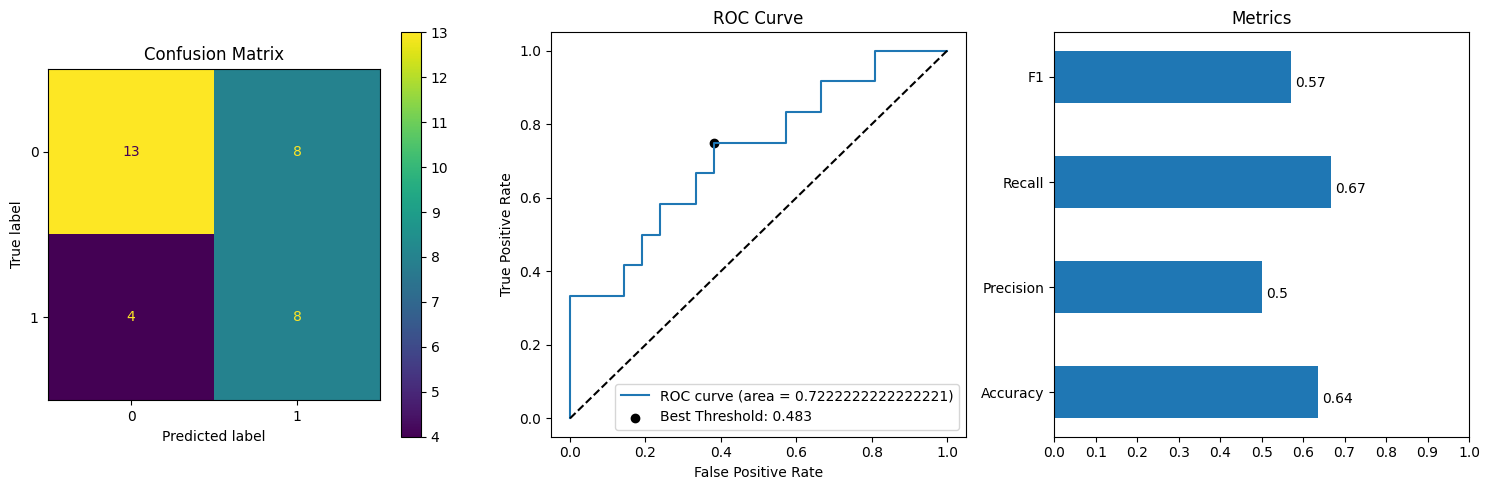

Computed prediction using budge, NO training done.


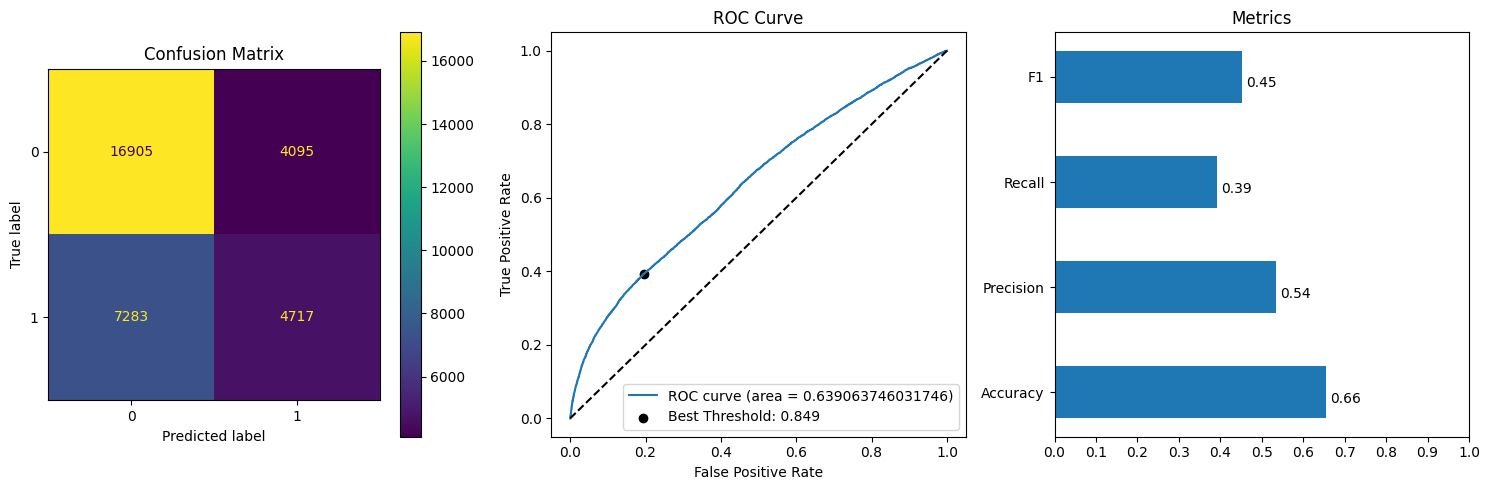

Training with budget finished!
Computed prediction using budge, NO training done.


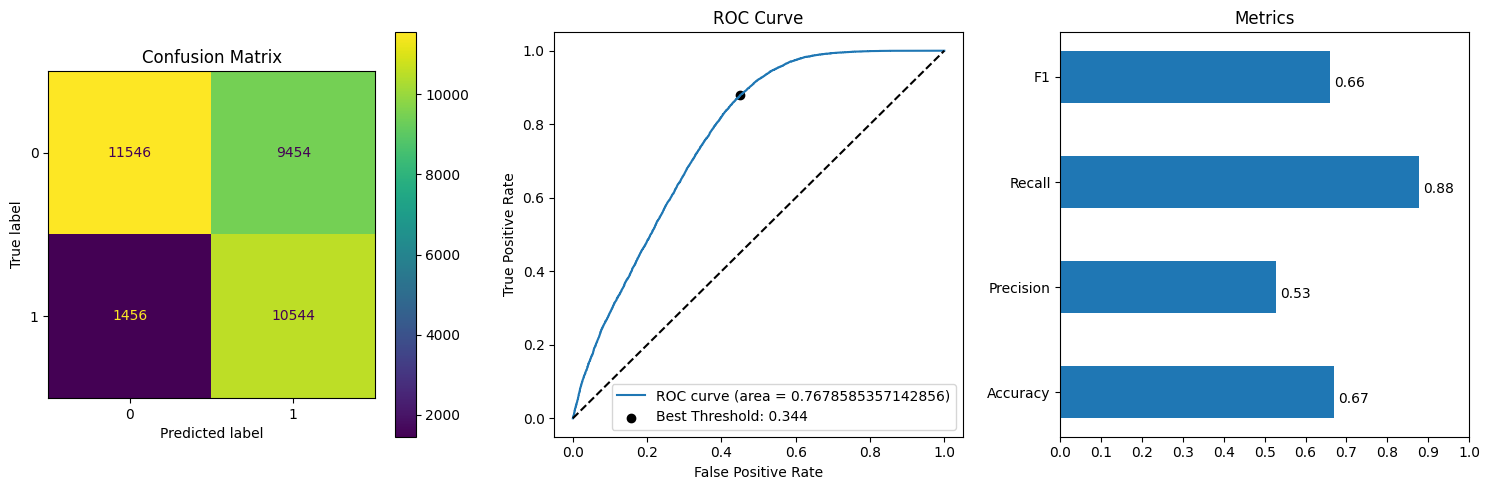

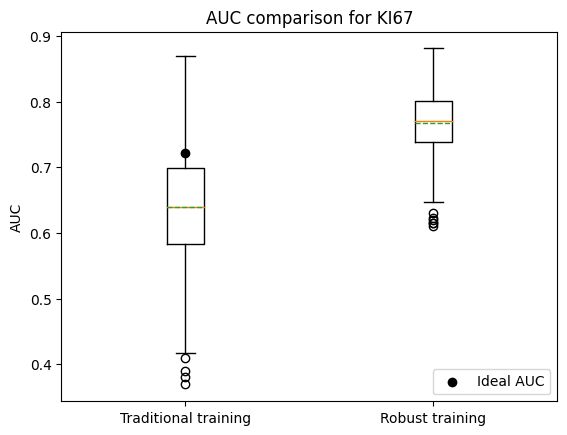

Original features, 1024 features.
Features with high correlation: ['14', '44', '72', '81', '86', '99', '102', '103', '114', '121', '133', '135', '154', '175', '181', '186', '196', '206', '216', '218', '225', '230', '233', '235', '252', '253', '255', '256', '258', '261', '263', '272', '281', '290', '293', '294', '298', '299', '317', '341', '359', '365', '366', '367', '368', '372', '382', '383', '385', '386', '387', '388', '391', '393', '394', '400', '409', '416', '423', '424', '428', '435', '451', '467', '469', '471', '474', '478', '484', '492', '504', '507', '511', '525', '526', '529', '532', '536', '542', '544', '559', '572', '573', '574', '575', '576', '579', '583', '592', '599', '602', '603', '604', '608', '610', '616', '619', '636', '639', '640', '643', '646', '647', '651', '655', '665', '667', '668', '669', '671', '672', '676', '681', '686', '693', '694', '695', '700', '701', '704', '705', '715', '716', '719', '720', '724', '732', '734', '736', '738', '740', '741', '743', '745', '

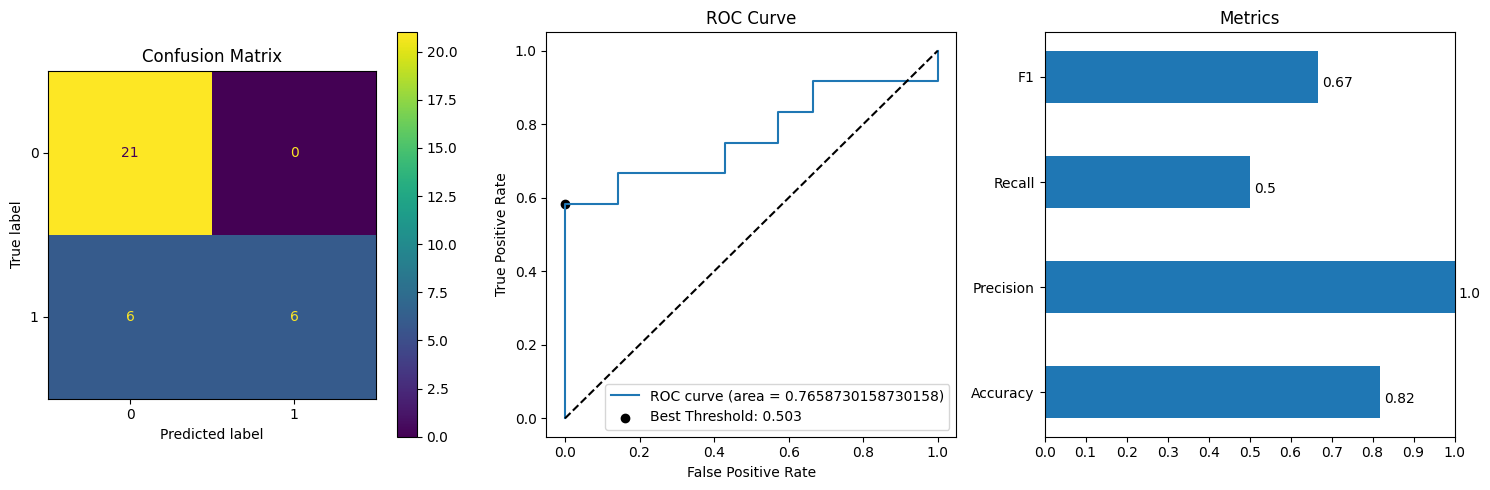

Computed prediction using budge, NO training done.


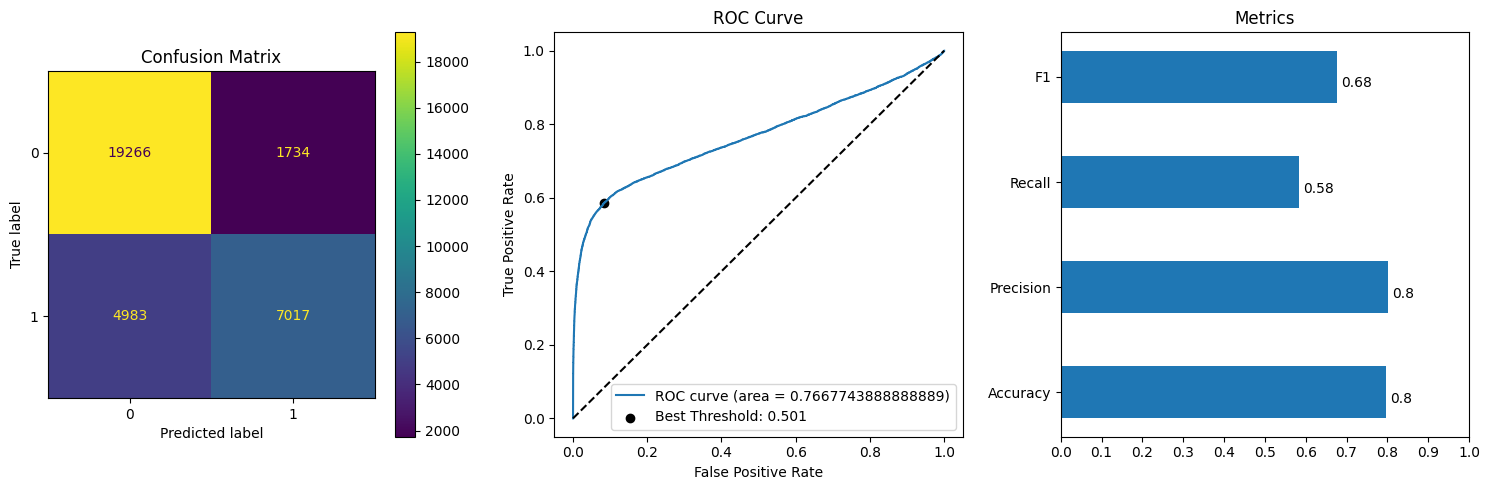

The positive cases of KI67 represent 36.4%
Original features, 5 features.
Features with high correlation: []
Features with high correlation dropped, 5 features remaining.
The selected features are: ['firstorder_Entropy' 'glcm_Correlation' 'glcm_Idmn' '806']
Features scaled together. This could represent DATA LEAKAGE.
Features prepared, 33 samples, 4 features.
Training finished!


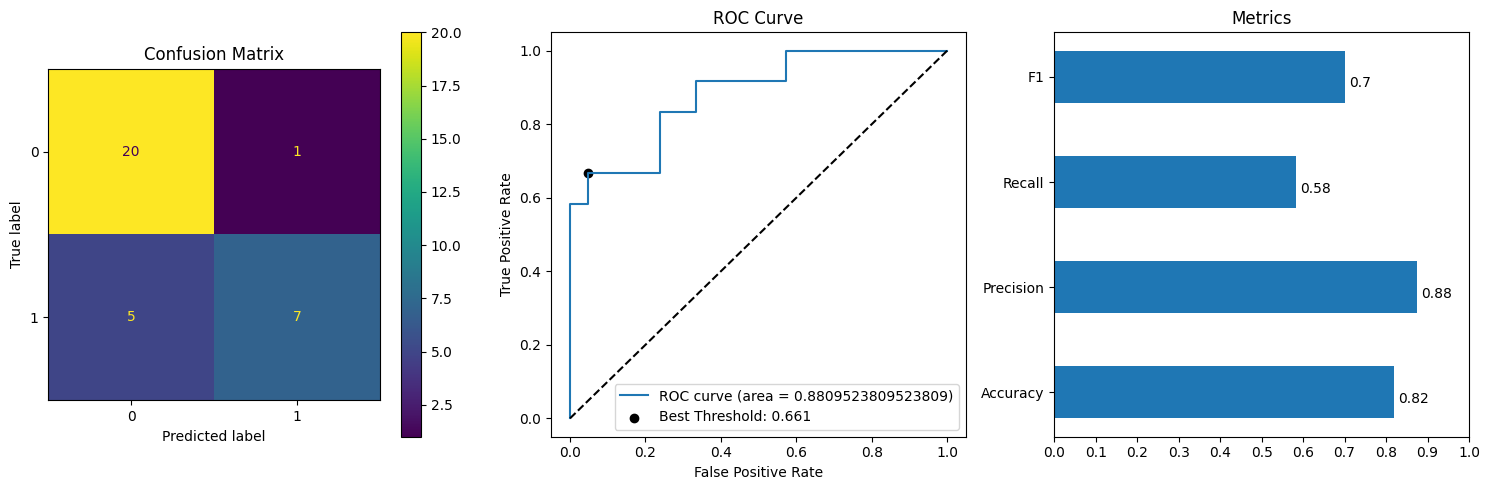

Computed prediction using budge, NO training done.


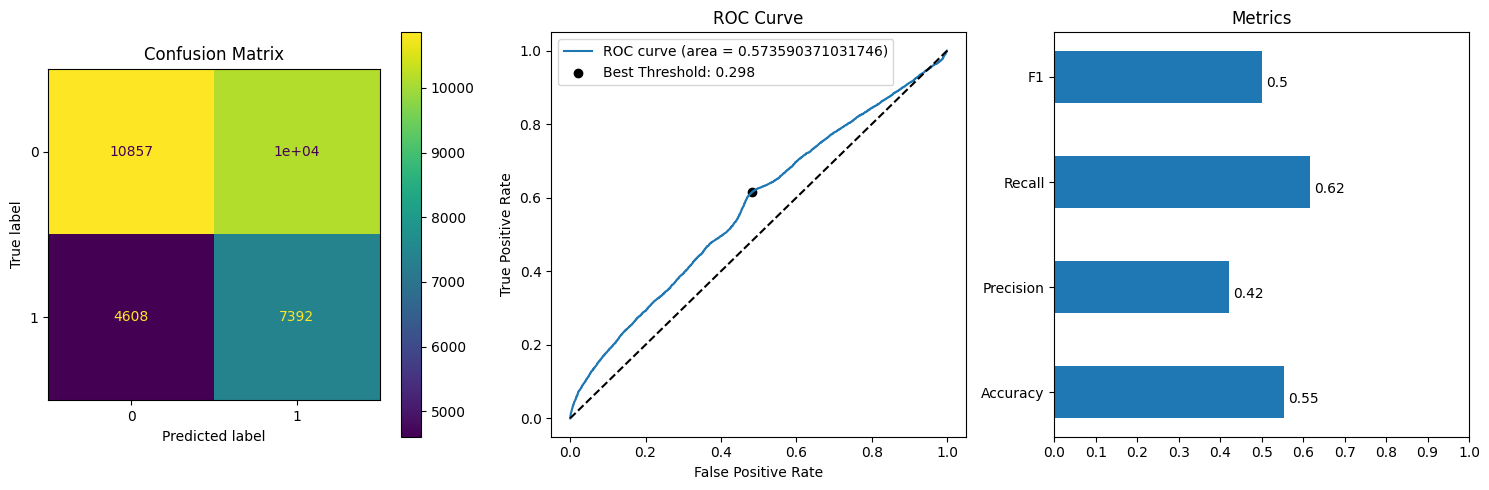

Training with budget finished!
Computed prediction using budge, NO training done.


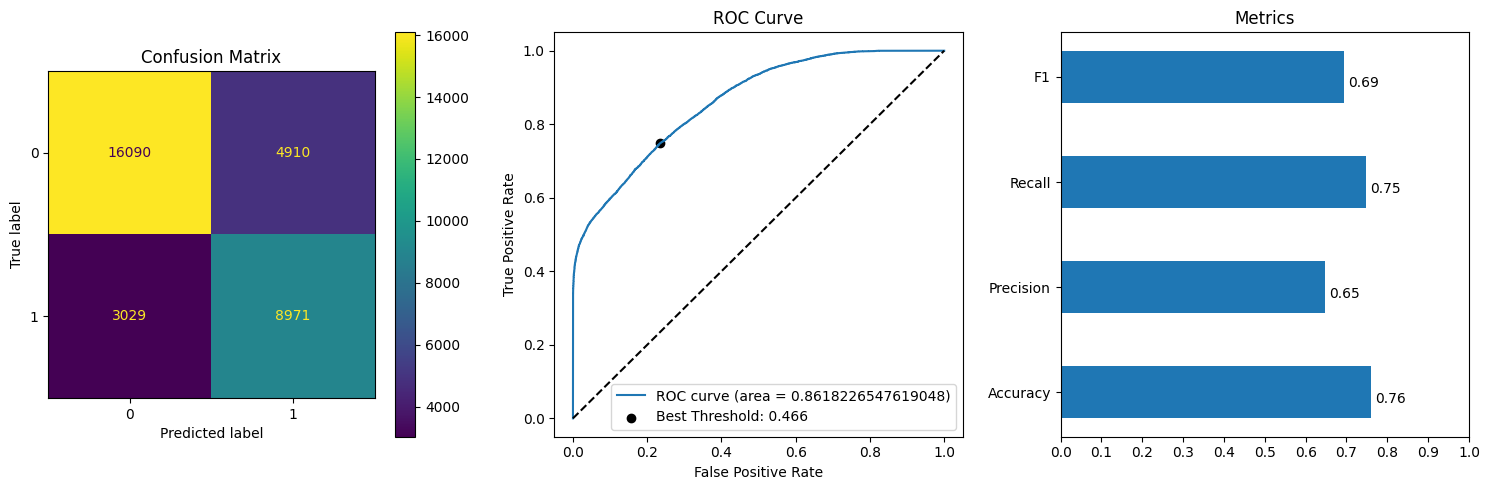

999


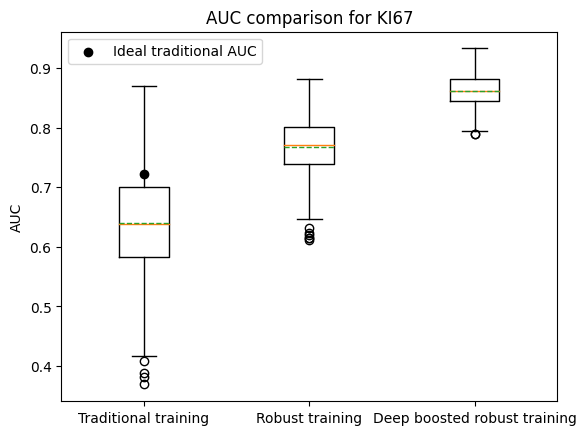

In [73]:
# set the seed
np.random.seed(10)
# results path
results_path = repo_path / 'deep/results'
results_path.mkdir(parents=True, exist_ok=True)

# estimator
pred = LogisticRegression(class_weight='balanced')
parameters = {'penalty':['l2', 'l1'], 'C':[0.001, 0.01, 0.1, 1, 10], 'solver':['liblinear']}

# Input data
receptor = 'KI67'

# prepare pipeline
features = pd.read_csv(repo_path / 'data/features/pure_corrected/mean_features.csv', index_col=0)
predictor = predictor_machine()
predictor.set_receptor(receptor, show_distribution=True)
predictor.set_classifier(pred, parameters, verbose=0)

# prepare features
predictor.prepare_features(features, show_info=True, scale_together=True, n_features=4, corr_threshold=0.90)
predictor.train()
roc_auc_trad = predictor.compute_metrics(plot_metrics=True)
pos_probabilities_trad = predictor.budget_inference()
predictor.compute_metrics(plot_metrics=True)
predictor.budget_training()
pos_probabilities_rob = predictor.budget_inference()
predictor.compute_metrics(plot_metrics=True)
predictor.box_plots_budget(pos_probabilities_trad, pos_probabilities_rob, roc_auc_trad)

deep_features = pd.read_csv(repo_path / 'data/deep/features/features_1024/mean_features.csv', index_col=0)
deep_predictor = predictor_machine()
deep_predictor.set_receptor(receptor, show_distribution=False)
####
# classifier
deep_predictor.set_classifier(pred, parameters, verbose=0)
####
deep_predictor.prepare_features(deep_features, show_info=True, scale_together=True, n_features=1, corr_threshold=0.90, training=True)
deep_predictor.train()
deep_predictor.compute_metrics(plot_metrics=True)
deep_predictor.budget_inference()
deep_predictor.compute_metrics(plot_metrics=True)

# concatenate the two selected features
selected_features = np.concatenate((predictor.selected_features, deep_predictor.selected_features))
combined_features = pd.read_csv(repo_path / 'data/features/combined_features/mean_features_combined.csv', index_col=0)
combined_features = combined_features[selected_features]

# prepare pipeline
combined_predictor = predictor_machine()
combined_predictor.set_receptor(receptor, show_distribution=True)

# classifier
combined_predictor.set_classifier(pred, parameters, verbose=0)

# prepare features
combined_predictor.prepare_features(combined_features, show_info=True, scale_together=True, n_features=4, corr_threshold=0.90)

# normal training
combined_predictor.train()
combined_predictor.compute_metrics(plot_metrics=True)
# budget testing
combined_predictor.budget_inference()
combined_predictor.compute_metrics(plot_metrics=True)
# budget training and testing
combined_predictor.budget_training()
pos_proba_DeepRob = combined_predictor.budget_inference() #<----- this is the one to use
combined_predictor.compute_metrics(plot_metrics=True)

# final bbox
combined_predictor.box_plots_DeepComparison(pos_probabilities_trad, pos_probabilities_rob, pos_proba_DeepRob, roc_auc_trad)

# save the results
results = pd.DataFrame({'Traditional':pos_probabilities_trad,
                        'Robust':pos_probabilities_rob,
                        'DeepRob':pos_proba_DeepRob,
                        'True_Labels':combined_predictor.true_labels,
                        'AUC_traditional':roc_auc_trad})
results.to_csv(results_path / f'{receptor}_results.csv')

# All boxplots together

In [74]:
def posProbas2AUC(pos_proba:np.array, true_labels:np.array, synthetic_units:int):
    """convert raw positive probabilities to AUC

    Args:
        pos_proba (np.array): positive probability of the classifier
        true_labels (np.array): true labels
        synthetic_units (int): number of synthetic units

    Returns:
        np.array: AUC for each synthetic unit
    """
    pos_proba = pos_proba.reshape(-1, synthetic_units)
    true_labels = true_labels.reshape(-1, synthetic_units)
    auc= []
    for i in range(pos_proba.shape[1]):
        auc.append(roc_auc_score(true_labels[:,i], pos_proba[:,i]))
    auc = np.asanyarray(auc)

    return auc

def reults2AUCs(results:pd.DataFrame, synthetic_units:int):
    auc_er_trad = posProbas2AUC(results.Traditional.values, results.True_Labels.values, synthetic_units)
    auc_er_rob = posProbas2AUC(results.Robust.values, results.True_Labels.values, synthetic_units)
    auc_er_DeepRob = posProbas2AUC(results.DeepRob.values, results.True_Labels.values, synthetic_units)
    auc_original = results.AUC_traditional.values[0]

    return auc_er_trad, auc_er_rob, auc_er_DeepRob, auc_original

In [23]:
# read all 3 receptors results
PR_results = pd.read_csv(repo_path / 'deep/results/RP_results.csv', index_col=0)
ER_results = pd.read_csv(repo_path / 'deep/results/RE_results.csv', index_col=0)
ki67_results = pd.read_csv(repo_path / 'deep/results/KI67_results.csv', index_col=0)

synthetic_units = 1000
# compute the AUCs
auc_er_trad, auc_er_rob, auc_er_DeepRob, auc_er_original = reults2AUCs(ER_results, synthetic_units)
auc_pr_trad, auc_pr_rob, auc_pr_DeepRob, auc_pr_original = reults2AUCs(PR_results, synthetic_units)
auc_ki67_trad, auc_ki67_rob, auc_ki67_DeepRob, auc_ki67_original = reults2AUCs(ki67_results, synthetic_units)

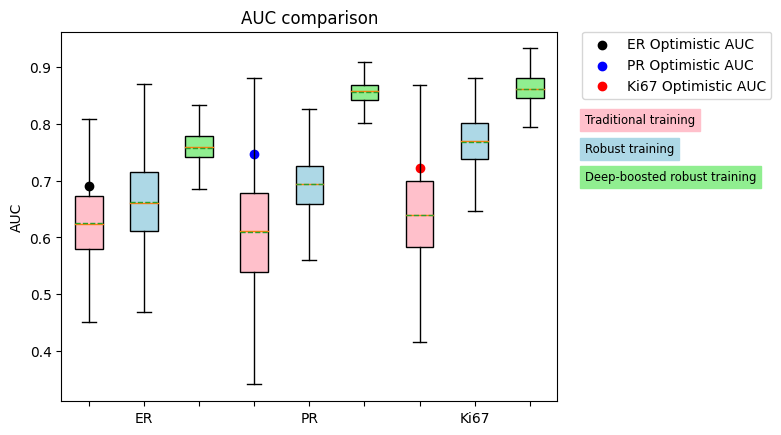

In [72]:
# plot boxplot
plt.figure()
plt.boxplot([auc_er_trad, auc_er_rob, auc_er_DeepRob,
            auc_pr_trad, auc_pr_rob, auc_pr_DeepRob,
            auc_ki67_trad, auc_ki67_rob, auc_ki67_DeepRob],
            showmeans=True, meanline=True, showfliers=False, patch_artist=True)
plt.xticks([1,2,3,4,5,6,7,8,9], ['', 'ER', '', '', 'PR', '', '', 'Ki67', ''])
plt.ylabel('AUC')
plt.title(f'AUC comparison')
# # show in a point the ideal auc value
plt.scatter(1, auc_er_original , marker='o', color='black', label='ER Optimistic AUC')
plt.scatter(4, auc_pr_original , marker='o', color='blue', label='PR Optimistic AUC')
plt.scatter(7, auc_ki67_original , marker='o', color='red', label='Ki67 Optimistic AUC')
# put legend outside the boxplot
# fill colors
colors = ['pink', 'lightblue', 'lightgreen', 'pink', 'lightblue', 'lightgreen', 'pink', 'lightblue', 'lightgreen']
for patch, color in zip(plt.gca().patches, colors):
    patch.set_facecolor(color)
# shoe legend vertically
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.text(10, 0.8, f'Traditional training',
         backgroundcolor='pink', color='black', weight='roman',
         size='small')
plt.text(10, 0.75, f'Robust training',
            backgroundcolor='lightblue', color='black', weight='roman',
            size='small')
plt.text(10, 0.7, f'Deep-boosted robust training',
            backgroundcolor='lightgreen', color='black', weight='roman',
            size='small')
plt.show()

In [75]:
ki67_results.keys()

Index(['Traditional', 'Robust', 'DeepRob', 'True_Labels', 'AUC_traditional'], dtype='object')

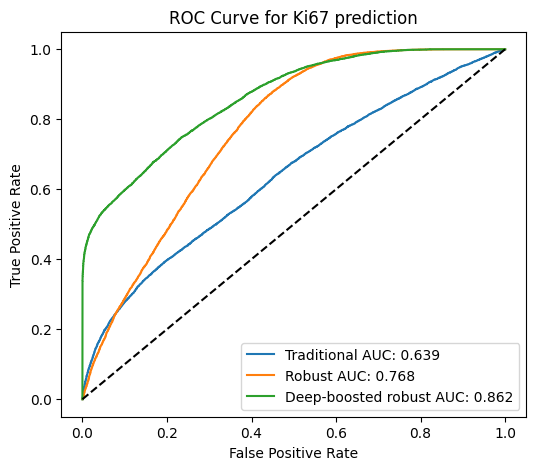

In [81]:
ki67_results = pd.read_csv(repo_path / 'deep/results/KI67_results.csv', index_col=0)
# for one case, compute the AUROCs
roc_auc_trad = roc_auc_score(ki67_results.True_Labels.values, ki67_results.Traditional.values)
roc_auc_rob = roc_auc_score(ki67_results.True_Labels.values, ki67_results.Robust.values)
roc_auc_DeepRob = roc_auc_score(ki67_results.True_Labels.values, ki67_results.DeepRob.values)

fpr_trad, tpr_trad, _ = roc_curve(ki67_results.True_Labels.values, ki67_results.Traditional.values)
fpr_rob, tpr_rob, _ = roc_curve(ki67_results.True_Labels.values, ki67_results.Robust.values)
fpr_DeepRob, tpr_DeepRob, _ = roc_curve(ki67_results.True_Labels.values, ki67_results.DeepRob.values)

# plot confusion matrix on the left
fig, ax = plt.subplots(1,1, figsize=(10,5))
# plot the ROC curve on the right
ax.plot(fpr_trad, tpr_trad, label=f'Traditional AUC: {roc_auc_trad.round(3)}')
ax.plot(fpr_rob, tpr_rob, label=f'Robust AUC: {roc_auc_rob.round(3)}')
ax.plot(fpr_DeepRob, tpr_DeepRob, label=f'Deep-boosted robust AUC: {roc_auc_DeepRob.round(3)}')
ax.plot([0,1],[0,1], 'k--')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve for Ki67 prediction')
ax.legend()